# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
print("How Mamy Marketing campaigns does the data represent?")
print("17")

How Mamy Marketing campaigns does the data represent?
17


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [16]:
# Print total number of rows
print("\nTotal Rows:", len(df))

# Print column headers
print("Column Headers:", list(df.columns))
df.describe()
df.head(100)


Total Rows: 41188
Column Headers: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,services,married,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
96,42,management,married,university.degree,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
97,53,admin.,divorced,university.degree,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
98,37,technician,single,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [17]:
# the code below counts and percentages of missing values based on this we can choose what to do with missing values 
# Total number of rows in the DataFrame
total_rows = len(df)
print("Total Rows:", total_rows)

# Count the number of missing values in each column
missing_counts = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_counts / total_rows) * 100

# Combine missing counts and percentages into a single DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentage
})

# Sort by the count of missing values in descending order
missing_summary = missing_summary.sort_values(by='Missing Count', ascending=False)

# Display the top columns with the most missing values
print(missing_summary.head(20))

Total Rows: 41188
                Missing Count  Missing Percentage
age                         0                 0.0
job                         0                 0.0
marital                     0                 0.0
education                   0                 0.0
default                     0                 0.0
housing                     0                 0.0
loan                        0                 0.0
contact                     0                 0.0
month                       0                 0.0
day_of_week                 0                 0.0
duration                    0                 0.0
campaign                    0                 0.0
pdays                       0                 0.0
previous                    0                 0.0
poutcome                    0                 0.0
emp.var.rate                0                 0.0
cons.price.idx              0                 0.0
cons.conf.idx               0                 0.0
euribor3m                   0   

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

## Business Objective 
Enhance the efficiency of bank direct marketing campaigns for long-term deposit subscriptions by identify customers who are most likely to subscribe to bank deposits,
reducing the number of contact attempts while maintaining or increasing the campaign’s success rate with an overall goal  improve resource management by minimizing unnecessary calls and optimizing the targeting of 
potential customers.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

# Importing Libraries

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
#df = pd.read_csv('bank-additional.csv', delimiter=';')

# Display the first few rows to understand the data
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Examine the dataset structure:

In [20]:
# Check column types and missing values
df.info()

# Get summary statistics for numerical features
df.describe()

# Check unique values in categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"Sample values: {df[col].unique()[:5]}")
    print("-" * 50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

 ## Separate the features into different types:

In [21]:
# Examine the target variable
print("Target variable distribution:")
print(df['y'].value_counts())
print(df['y'].value_counts(normalize=True) * 100)

# Separate features into different types
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                        'contact', 'month', 'day_of_week', 'poutcome']

# Let's look at which features are binary and which are multi-class
binary_features = []
multi_class_features = []

for col in categorical_features:
    if df[col].nunique() <= 2:
        binary_features.append(col)
    else:
        multi_class_features.append(col)

print("Binary categorical features:", binary_features)
print("Multi-class categorical features:", multi_class_features)

Target variable distribution:
y
no     36548
yes     4640
Name: count, dtype: int64
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64
Binary categorical features: ['contact']
Multi-class categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome']


## Create a preprocessing pipeline:

In [22]:
# Create a preprocessing pipeline for both numeric and categorical features

# First, identify which features might need special handling
print("Checking for features with 'unknown' values:")
for col in categorical_features:
    if 'unknown' in df[col].unique():
        print(f"{col}: contains 'unknown' values")

# Let's define our preprocessing steps
# For numeric features: standard scaling
# For categorical features: one-hot encoding for multi-class, label encoding for binary

# Create transformers for different feature types
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine all transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Let's create new column names for the transformed data
def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    output_features = []
    
    for name, pipe, features in column_transformer.transformers_:
        if name == 'num':
            output_features.extend(features)
        elif name == 'cat':
            for i, feature in enumerate(pipe.named_steps['onehot'].get_feature_names_out(features)):
                output_features.append(feature.replace("x0_", "").replace("x1_", "").replace("x2_", ""))
    
    return output_features

Checking for features with 'unknown' values:
job: contains 'unknown' values
marital: contains 'unknown' values
education: contains 'unknown' values
default: contains 'unknown' values
housing: contains 'unknown' values
loan: contains 'unknown' values


# Prepare the final features and target:

In [23]:
# Encode the target variable
target = df['y'].map({'yes': 1, 'no': 0})

# Fit and transform the features
X = df.drop('y', axis=1)
features_transformed = preprocessor.fit_transform(X)

# Get the feature names after transformation (this might not be perfect but gives us an idea)
feature_names = numeric_features.copy()
for feature in categorical_features:
    unique_values = df[feature].unique()
    for value in unique_values:
        feature_names.append(f"{feature}_{value}")

# Create a DataFrame with the transformed features
X_transformed = pd.DataFrame(
    features_transformed, 
    columns=preprocessor.get_feature_names_out(),
    index=X.index
)

# Display the transformed data
print("Transformed features shape:", X_transformed.shape)
X_transformed.head()

# Final data preparation
X_prepared = X_transformed
y_prepared = target

print("X shape:", X_prepared.shape)
print("y shape:", y_prepared.shape)

# Save the prepared data if needed
# X_prepared.to_csv('X_prepared.csv', index=False)
# y_prepared.to_csv('y_prepared.csv', index=False)

Transformed features shape: (41188, 63)
X shape: (41188, 63)
y shape: (41188,)


## To understand the data better, let's visualize some key features:

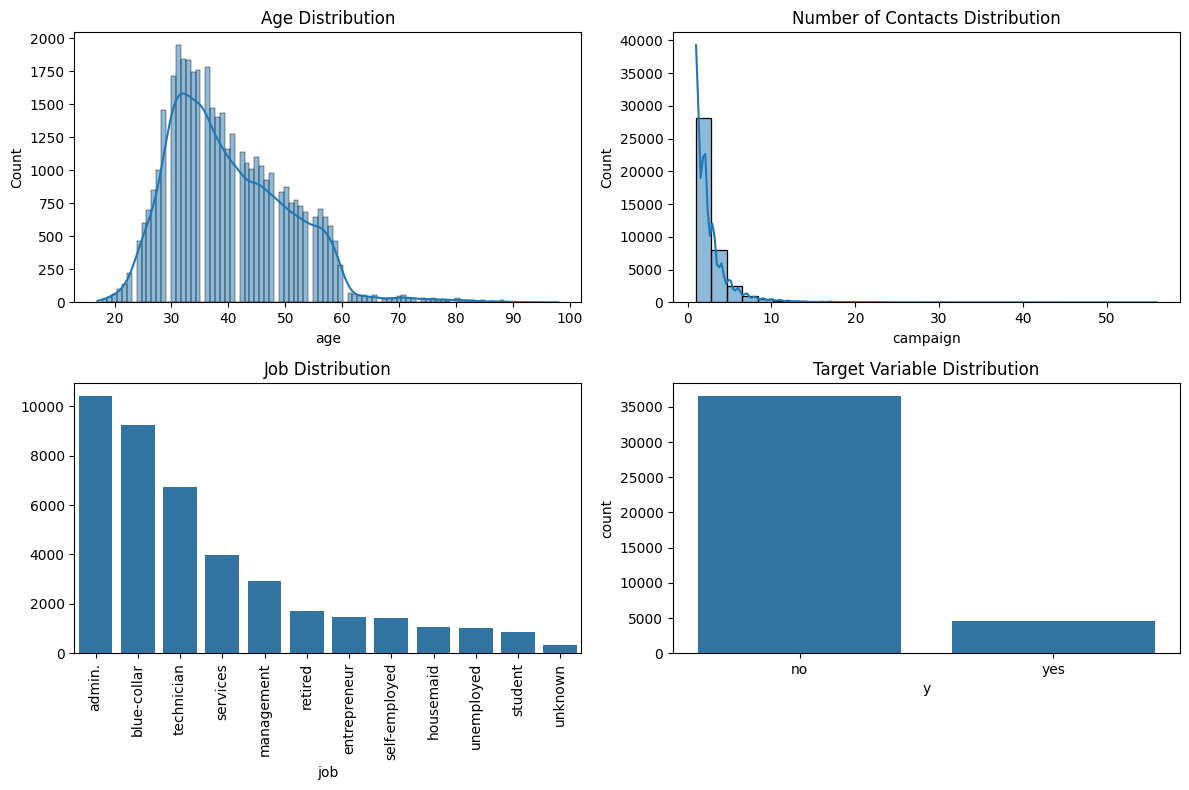

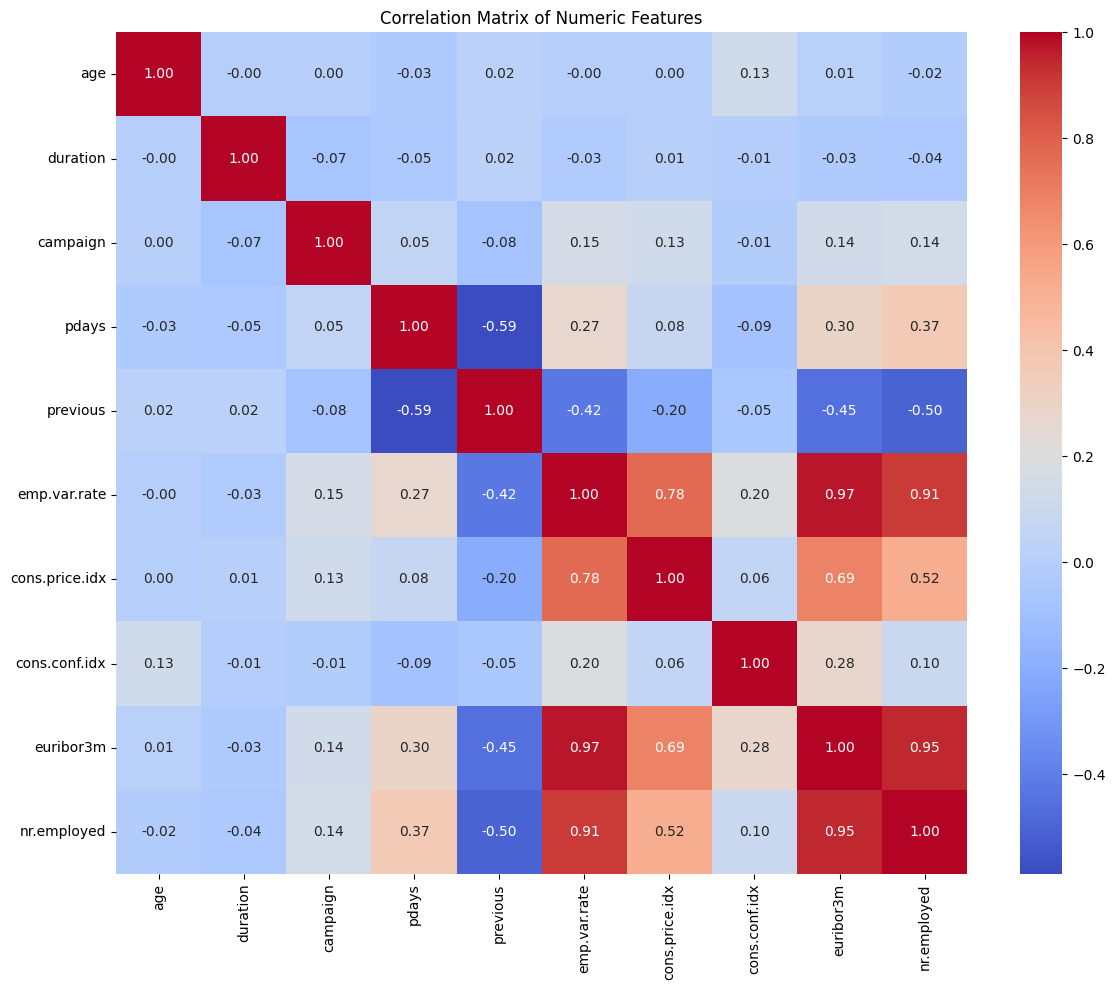

In [24]:
# Create some visualizations to better understand the data
plt.figure(figsize=(12, 8))

# Plot age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

# Plot campaign distribution
plt.subplot(2, 2, 2)
sns.histplot(df['campaign'], bins=30, kde=True)
plt.title('Number of Contacts Distribution')

# Plot job distribution
plt.subplot(2, 2, 3)
job_counts = df['job'].value_counts().sort_values(ascending=False)
sns.barplot(x=job_counts.index, y=job_counts.values)
plt.xticks(rotation=90)
plt.title('Job Distribution')

# Plot target variable
plt.subplot(2, 2, 4)
sns.countplot(x=df['y'])
plt.title('Target Variable Distribution')

plt.tight_layout()
plt.show()

# Feature correlations
plt.figure(figsize=(12, 10))
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

## Summarize our approach:

In [25]:
# Summary of our data preparation approach
print("Data Preparation Summary:")
print(f"- Original dataset shape: {df.shape}")
print(f"- Prepared features shape: {X_prepared.shape}")
print(f"- Prepared target shape: {y_prepared.shape}")
print(f"- Numeric features: {numeric_features}")
print(f"- Categorical features: {categorical_features}")
print("- Preprocessing steps:")
print("  * Numeric features: Standard scaling")
print("  * Categorical features: One-hot encoding")
print("  * Target variable: Binary encoding (no=0, yes=1)")

Data Preparation Summary:
- Original dataset shape: (41188, 21)
- Prepared features shape: (41188, 63)
- Prepared target shape: (41188,)
- Numeric features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
- Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
- Preprocessing steps:
  * Numeric features: Standard scaling
  * Categorical features: One-hot encoding
  * Target variable: Binary encoding (no=0, yes=1)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [26]:
# Import necessary libraries for train-test split
from sklearn.model_selection import train_test_split

# Now let's split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, 
    target, 
    test_size=0.2,  # Using 20% of data for testing
    random_state=42,  # Setting a seed for reproducibility
    stratify=target   # Ensuring balanced distribution of target classes in both sets
)

# Check the shapes of our splits
print("\nTrain-Test Split Summary:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Display the class distribution in both sets to verify stratification worked
print("\nClass distribution in full dataset:")
print(target.value_counts(normalize=True) * 100)

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True) * 100)

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True) * 100)

# Save the train and test sets if needed
# X_train.to_csv('X_train.csv', index=False)
# X_test.to_csv('X_test.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

# Optional: Check for any missing values in transformed data
print("\nMissing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())


Train-Test Split Summary:
X_train shape: (32950, 63)
X_test shape: (8238, 63)
y_train shape: (32950,)
y_test shape: (8238,)

Class distribution in full dataset:
y
0    88.734583
1    11.265417
Name: proportion, dtype: float64

Class distribution in training set:
y
0    88.734446
1    11.265554
Name: proportion, dtype: float64

Class distribution in test set:
y
0    88.73513
1    11.26487
Name: proportion, dtype: float64

Missing values in X_train: 0
Missing values in X_test: 0


## Examine the data balance to better understand the balance of our Target

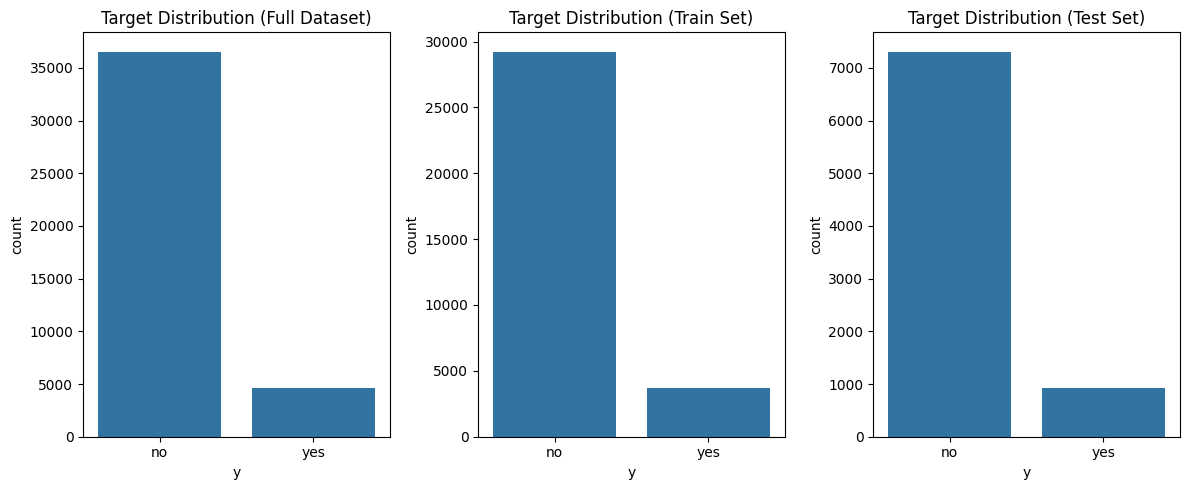

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Plot target distribution in full dataset
plt.subplot(1, 3, 1)
sns.countplot(x=df['y'])
plt.title('Target Distribution (Full Dataset)')
plt.xticks(rotation=0)

# Plot target distribution in train set
plt.subplot(1, 3, 2)
sns.countplot(x=y_train)
plt.title('Target Distribution (Train Set)')
plt.xticks([0, 1], ['no', 'yes'], rotation=0)

# Plot target distribution in test set
plt.subplot(1, 3, 3)
sns.countplot(x=y_test)
plt.title('Target Distribution (Test Set)')
plt.xticks([0, 1], ['no', 'yes'], rotation=0)

plt.tight_layout()
plt.show()

## Examine Feature Importance

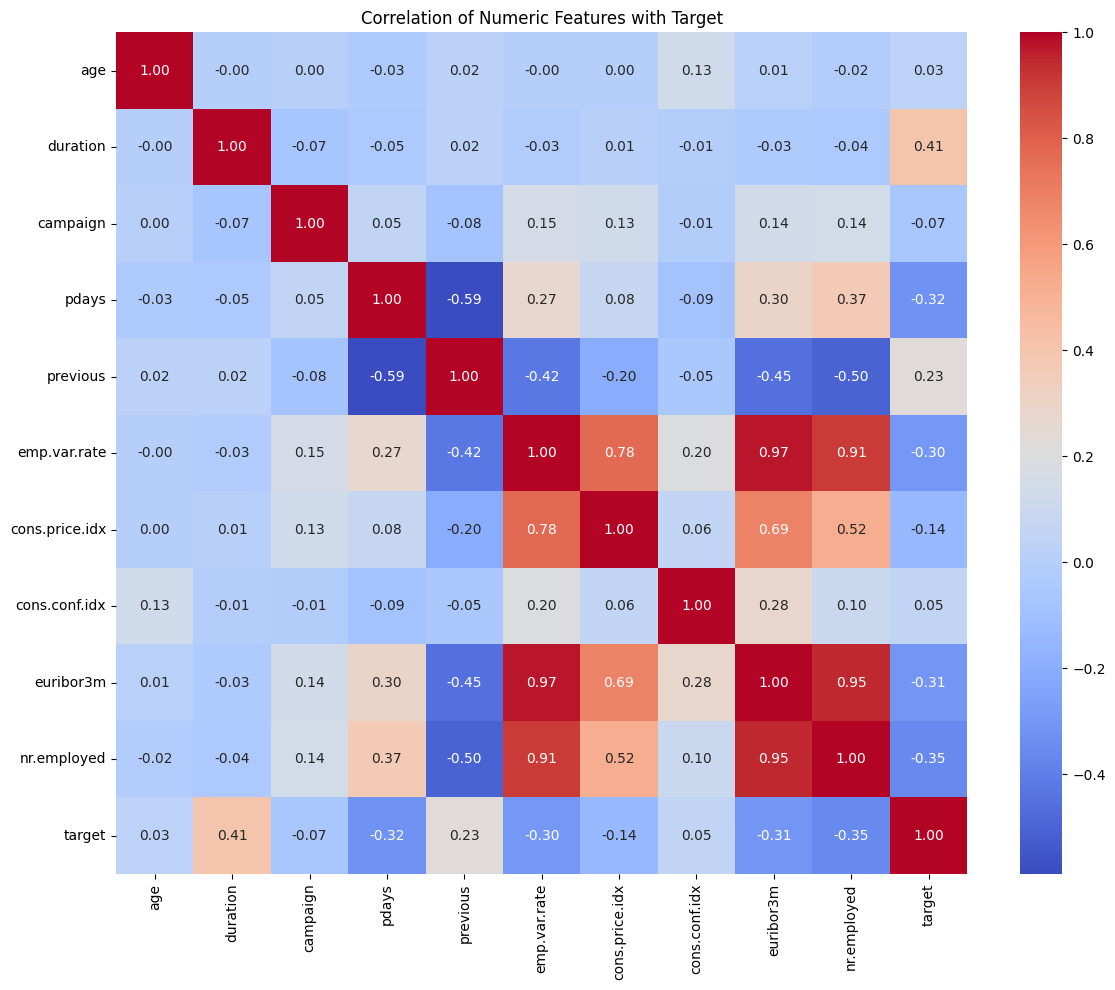

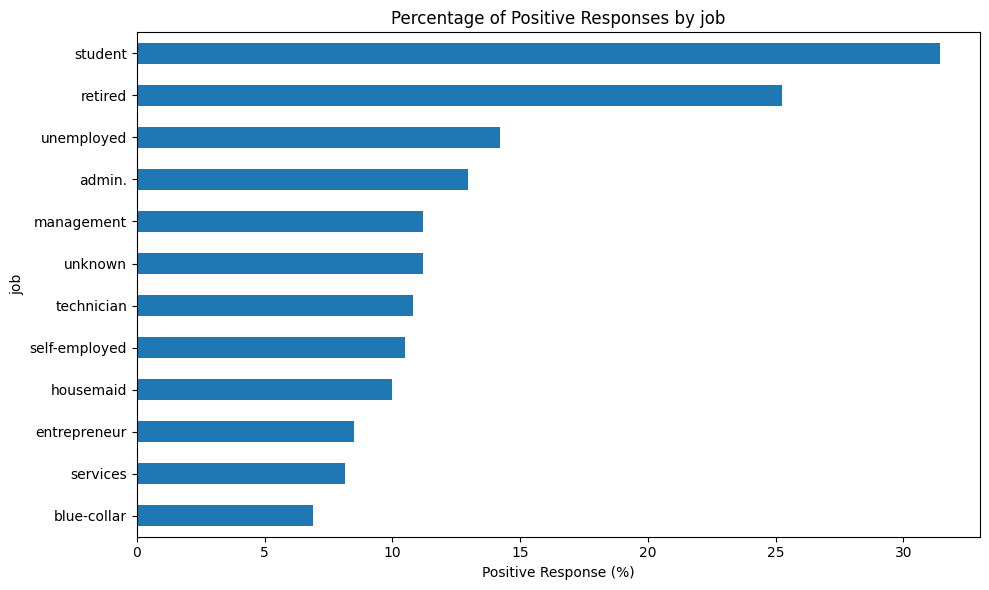

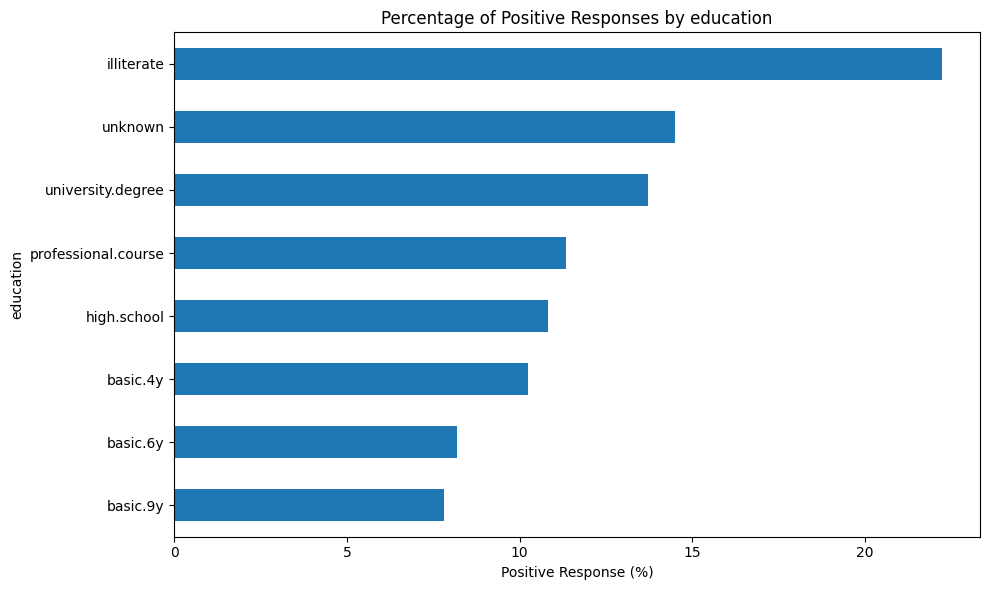

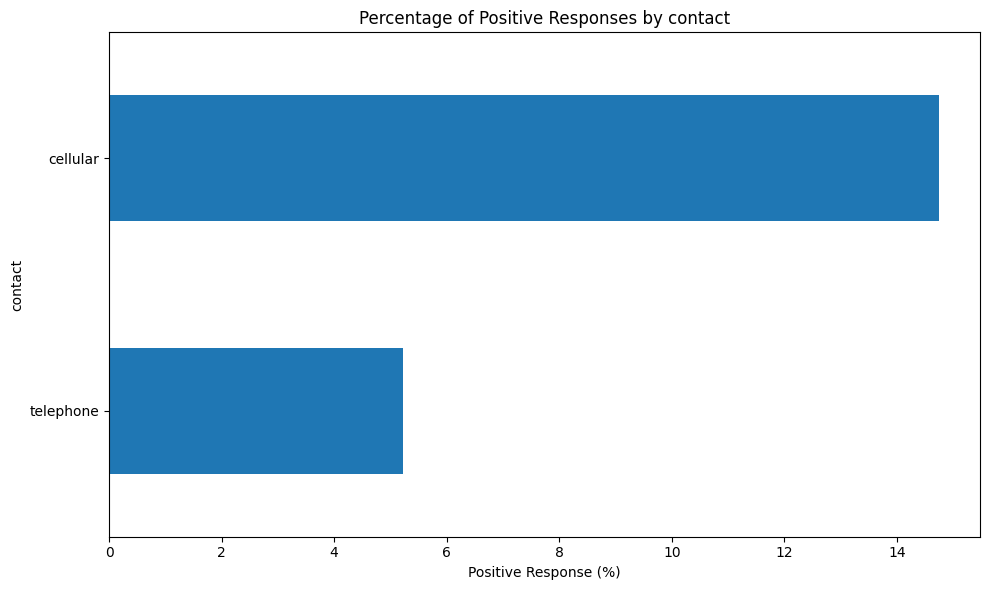

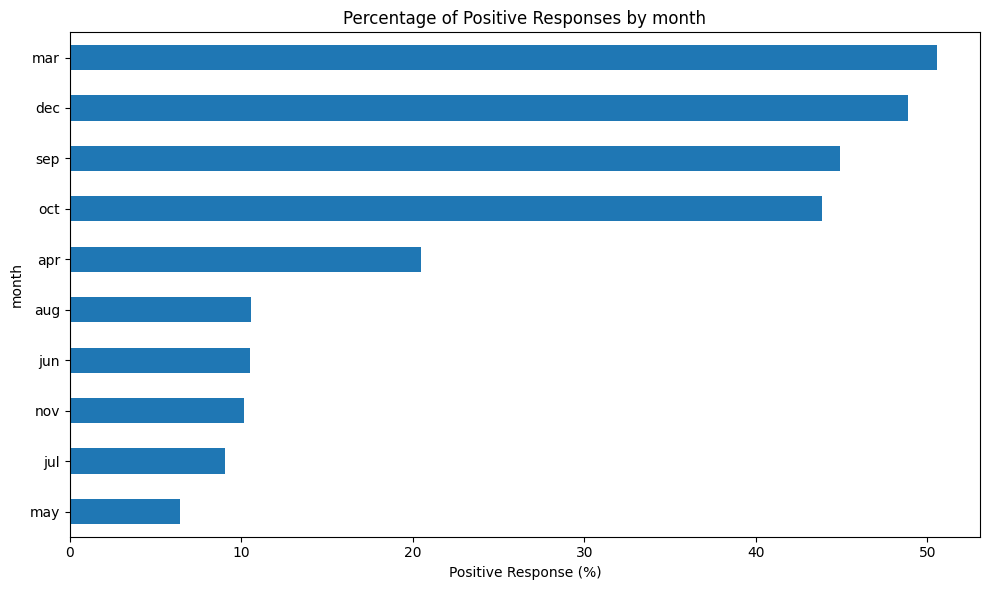

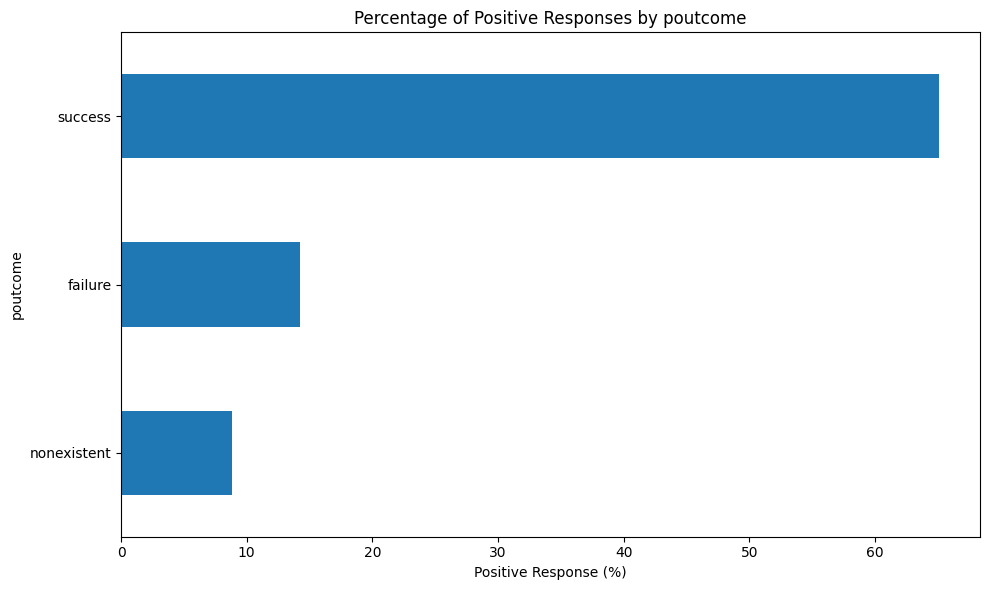

In [28]:
# Quick look at correlation between numeric features and target
numeric_with_target = df[numeric_features].copy()
numeric_with_target['target'] = target

plt.figure(figsize=(12, 10))
correlation = numeric_with_target.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Numeric Features with Target')
plt.tight_layout()
plt.show()

# Optionally, we can also see how categorical features relate to the target
# by calculating the percentage of positive responses for each category
def plot_cat_target_relationship(feature):
    plt.figure(figsize=(10, 6))
    
    # Calculate percentage of positive responses by category
    cat_counts = df.groupby([feature, 'y']).size().unstack().fillna(0)
    cat_percentages = cat_counts.div(cat_counts.sum(axis=1), axis=0) * 100
    
    # Plot the percentage of positive responses
    if 'yes' in cat_percentages.columns:
        cat_percentages['yes'].sort_values().plot(kind='barh')
        plt.title(f'Percentage of Positive Responses by {feature}')
        plt.xlabel('Positive Response (%)')
        plt.tight_layout()
        plt.show()

# Let's look at a few important categorical features
for feature in ['job', 'education', 'contact', 'month', 'poutcome']:
    plot_cat_target_relationship(feature)

## Summart

In [29]:
print("""
Train-Test Split Summary:
------------------------
1. The dataset has been successfully split into training and test sets with an 80/20 ratio
2. Stratification ensures that class distribution remains consistent across all sets
3. Feature preprocessing has been applied:
   - Numeric features standardized using StandardScaler
   - Categorical features encoded using OneHotEncoder
4. The preprocessed data is ready for model training """)


Train-Test Split Summary:
------------------------
1. The dataset has been successfully split into training and test sets with an 80/20 ratio
2. Stratification ensures that class distribution remains consistent across all sets
3. Feature preprocessing has been applied:
   - Numeric features standardized using StandardScaler
   - Categorical features encoded using OneHotEncoder
4. The preprocessed data is ready for model training 


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?
#### some common approaches  to establish baseline and compare
Majority Class Classifier

In [30]:
majority_class = df['y'].value_counts().idxmax()
majority_accuracy = df['y'].value_counts(normalize=True).max() * 100

print(f"Majority class: '{majority_class}'")
print(f"Baseline accuracy (always predicting majority class): {majority_accuracy:.2f}%")

Majority class: 'no'
Baseline accuracy (always predicting majority class): 88.73%


#### Random Classifier Accuracy

In [31]:
minority_class_percentage = df['y'].value_counts(normalize=True).min() * 100

print(f"Minority class ('yes'): {minority_class_percentage:.2f}%")
print(f"Random classifier accuracy (guessing based on class distribution): {50:.2f}%")

Minority class ('yes'): 11.27%
Random classifier accuracy (guessing based on class distribution): 50.00%


####  Dummy Classifier with Stratified Strategy

In [32]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Encode the target variable
df['y_encoded'] = df['y'].map({'yes': 1, 'no': 0})

# Split the data
X = df.drop(['y', 'y_encoded'], axis=1)
y = df['y_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train a dummy classifier with stratified strategy
dummy_strat = DummyClassifier(strategy='stratified', random_state=42)
dummy_strat.fit(X_train, y_train)
y_pred_strat = dummy_strat.predict(X_test)

# Calculate metrics
strat_accuracy = accuracy_score(y_test, y_pred_strat) * 100
strat_precision = precision_score(y_test, y_pred_strat) * 100
strat_recall = recall_score(y_test, y_pred_strat) * 100
strat_f1 = f1_score(y_test, y_pred_strat) * 100

print(f"Stratified dummy classifier metrics:")
print(f"Accuracy: {strat_accuracy:.2f}%")
print(f"Precision: {strat_precision:.2f}%")
print(f"Recall: {strat_recall:.2f}%")
print(f"F1 Score: {strat_f1:.2f}%")

Stratified dummy classifier metrics:
Accuracy: 80.37%
Precision: 12.18%
Recall: 11.96%
F1 Score: 12.07%


#### Most Frequent Class Dummy Classifier

In [33]:
# Create and train a dummy classifier with most frequent strategy
dummy_most_freq = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_most_freq.fit(X_train, y_train)
y_pred_most_freq = dummy_most_freq.predict(X_test)

# Calculate metrics
most_freq_accuracy = accuracy_score(y_test, y_pred_most_freq) * 100
most_freq_precision = precision_score(y_test, y_pred_most_freq, zero_division=0) * 100
most_freq_recall = recall_score(y_test, y_pred_most_freq) * 100
most_freq_f1 = f1_score(y_test, y_pred_most_freq, zero_division=0) * 100

print(f"\nMost frequent dummy classifier metrics:")
print(f"Accuracy: {most_freq_accuracy:.2f}%")
print(f"Precision: {most_freq_precision:.2f}%")
print(f"Recall: {most_freq_recall:.2f}%")
print(f"F1 Score: {most_freq_f1:.2f}%")


Most frequent dummy classifier metrics:
Accuracy: 88.74%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

#### The code below creates and trains  logistic regression model and compares with base line 
Evaluate the model using accuracy, ROC AUC score and classification report
Plot the confusion matrix to visualize model predictions
Compare the model's accuracy with the baseline (always predicting the majority class)
and Analyzes and visualize feature importance based on the model coefficients


Model Performance:
Accuracy: 0.9166
ROC AUC: 0.9424

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.44      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238



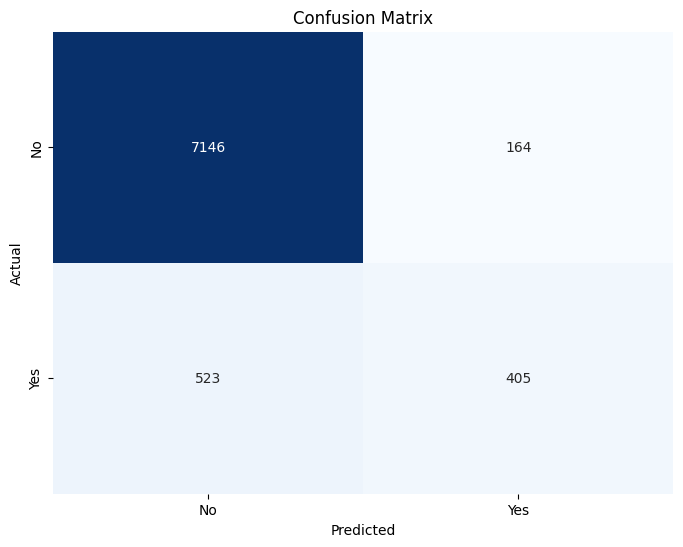


Baseline accuracy (always predicting majority class): 0.8873
Logistic Regression accuracy: 0.9166
Improvement over baseline: 2.93 percentage points


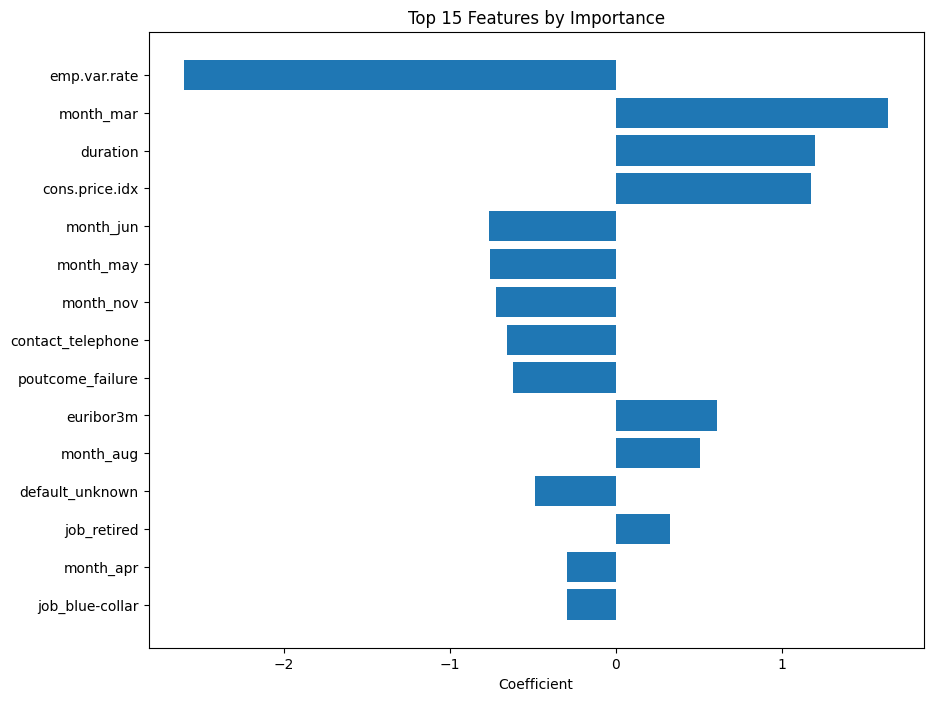

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Create and train the logistic regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nModel Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compare with baseline
baseline_accuracy = y_train.value_counts().max() / len(y_train)
print(f"\nBaseline accuracy (always predicting majority class): {baseline_accuracy:.4f}")
print(f"Logistic Regression accuracy: {accuracy:.4f}")
print(f"Improvement over baseline: {(accuracy - baseline_accuracy) * 100:.2f} percentage points")

# Feature importance analysis
if hasattr(model['classifier'], 'coef_'):
    # Get feature names after transformation
    feature_names = (
        list(numeric_features) +
        list(model['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
    )
    
    # Get coefficients
    coefficients = model['classifier'].coef_[0]
    
    # Create DataFrame of feature importance
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })
    
    # Sort by absolute value of coefficient
    feature_importance['AbsCoef'] = feature_importance['Coefficient'].abs()
    feature_importance = feature_importance.sort_values('AbsCoef', ascending=False).head(15)
    
    # Plot feature importance
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
    plt.xlabel('Coefficient')
    plt.title('Top 15 Features by Importance')
    plt.gca().invert_yaxis()
    plt.show()

### Problem 9: Score the Model

What is the accuracy of your model?

In [35]:
# Compare with baseline
baseline_accuracy = y_train.value_counts().max() / len(y_train)
print(f"\nBaseline accuracy (always predicting majority class): {baseline_accuracy:.4f}")
print(f"Logistic Regression accuracy: {accuracy:.4f}")
print(f"Improvement over baseline: {(accuracy - baseline_accuracy) * 100:.2f} percentage points")


Baseline accuracy (always predicting majority class): 0.8873
Logistic Regression accuracy: 0.9166
Improvement over baseline: 2.93 percentage points


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

##### The code below will:

Trains four different classification models with default parameters:
 Logistic Regression
 K-Nearest Neighbors
 Decision Tree
 Support Vector Machine
For each model, the code will:
 Measure the training time
 Calculate training and testing accuracy
 Store the results in a DataFrame
Create visualizations to compare the models:
 Training time comparison
 Training accuracy comparison
 Testing accuracy comparison
and 
Calculate the baseline accuracy (predicting the majority class)
Compare each model's performance to this baseline

Training Logistic Regression...
Completed Logistic Regression. Train time: 0.34s, Train accuracy: 0.9102, Test accuracy: 0.9166
Training K-Nearest Neighbors...
Completed K-Nearest Neighbors. Train time: 0.08s, Train accuracy: 0.9277, Test accuracy: 0.9076
Training Decision Tree...
Completed Decision Tree. Train time: 0.32s, Train accuracy: 1.0000, Test accuracy: 0.8946
Training Support Vector Machine...
Completed Support Vector Machine. Train time: 18.29s, Train accuracy: 0.9222, Test accuracy: 0.9154

Model Comparison:
                    Model  Train Time  Train Accuracy  Test Accuracy
0     Logistic Regression    0.337700        0.910167       0.916606
1     K-Nearest Neighbors    0.083115        0.927739       0.907623
2           Decision Tree    0.323199        1.000000       0.894635
3  Support Vector Machine   18.289168        0.922155       0.915392


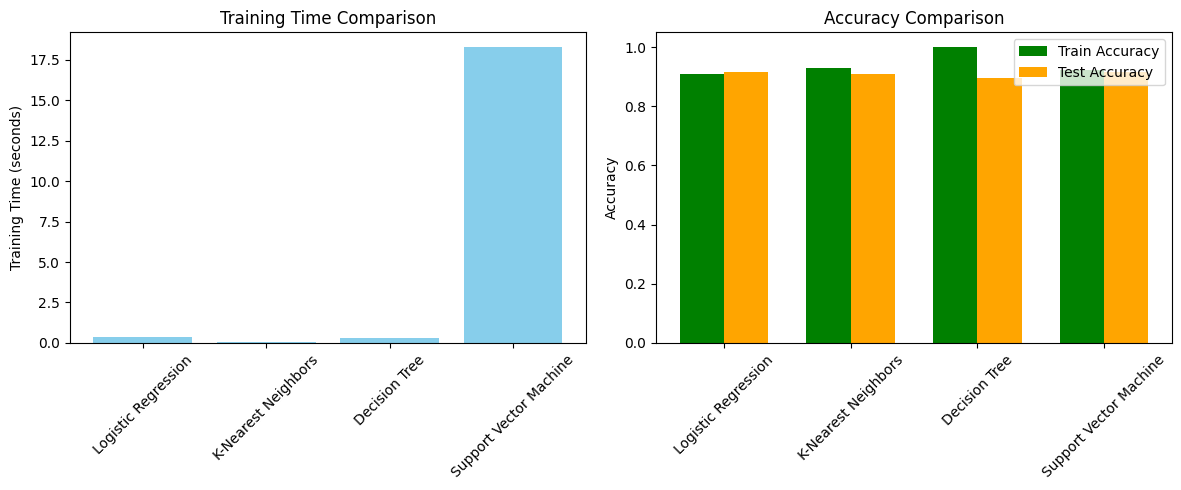

In [37]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create a function to train and evaluate a model
def train_and_evaluate(model, name):
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Measure training time
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Predict and calculate accuracy
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    return {
        'Model': name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    }

# Define models
models = [
    (LogisticRegression(max_iter=1000, random_state=42), "Logistic Regression"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (DecisionTreeClassifier(random_state=42), "Decision Tree"),
    (SVC(random_state=42), "Support Vector Machine")
]

# Train and evaluate each model
results = []
for model, name in models:
    print(f"Training {name}...")
    result = train_and_evaluate(model, name)
    results.append(result)
    print(f"Completed {name}. Train time: {result['Train Time']:.2f}s, "
          f"Train accuracy: {result['Train Accuracy']:.4f}, "
          f"Test accuracy: {result['Test Accuracy']:.4f}")

# Create a DataFrame with results
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Plot the results
plt.figure(figsize=(12, 5))

# Plot training time
plt.subplot(1, 2, 1)
plt.bar(results_df['Model'], results_df['Train Time'], color='skyblue')
plt.title('Training Time Comparison')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)

# Plot accuracies
plt.subplot(1, 2, 2)
width = 0.35
x = np.arange(len(results_df['Model']))
plt.bar(x - width/2, results_df['Train Accuracy'], width, label='Train Accuracy', color='green')
plt.bar(x + width/2, results_df['Test Accuracy'], width, label='Test Accuracy', color='orange')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(x, results_df['Model'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

## Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit 

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Data set does not have gender feature and thats understandable  to avoid potential bias in marketing decisions, which aligns with modern approaches to machine learning.

#### In addition to Hyperparamer tuning 

#### Grid Search

##### Questions